# Smart Planning V4 : appreciation model 2 - appreciation
  
## Details 

- Problem : `Regression`

- dataSet : 
    * dataset4: deleted `nombre de seances hors disponibilités d'intervenant` feature as it is handled by the planning generator software
    * dataset5: deleted 'contraint de simultanité' column
    
    <br>
    
- label & features values are integers ( 0...10) 


- Models :
    1. scikit Linear Regression Model 
    2. Decision tree
    3. SVM
    4. Random forest 
    5. Stochastic Gradient Descent
    6. KNeighbors_Regression 
    7. Bayesian_Ridge_Regression
    8. XGB Regressor
    9. ExtraTreesRegressor
    10. MLP Regressor (ANNs)



<br>

In [1]:
#!pip install sklearn==1.1.1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, tree, svm, model_selection
import math
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
%matplotlib inline

<br> 

# Get the dataset

In [4]:
df = pd.read_excel("dataset5.xlsx")
df.head()

salles_utilisees_Perc  salles_surutiliseess_Perc  places_videss_Perc  \
0                     98                         95                  94   
1                    100                         93                  92   
2                     91                         99                  91   
3                     99                        100                  91   
4                     94                         92                  92   

   seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  \
0                    98           99               96                   95   
1                    94           97               99                   94   
2                    91           93               95                   95   
3                    99           95               95                   92   
4                    91           95               91                   91   

   GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc  Label  
0              94                 99               98              99      0  
1              98                 94              100              99      0  
2             100                 96               90              94      1  
3              94                 97               91              96      0  
4              99                 99              100              91      1

<br>

# Quick look on the dataset

In [9]:
print("# DataSet shape : ", df.shape)
df.describe()

# DataSet shape :  (414, 12)


salles_utilisees_Perc  salles_surutiliseess_Perc  places_videss_Perc  \
count             414.000000                 414.000000          414.000000   
mean               34.908213                  34.048309           34.014493   
std                32.158826                  32.992003           31.955398   
min                 0.000000                   0.000000            0.000000   
25%                 9.000000                   7.000000            8.000000   
50%                23.000000                  21.000000           22.000000   
75%                55.000000                  59.750000           54.500000   
max               100.000000                 100.000000          100.000000   

       seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  \
count            414.000000   414.000000       414.000000   
mean              32.949275    35.202899        34.495169   
std               31.447713    32.426820        31.963186   
min                0.000000     0.000000         0.000000   
25%                8.000000     7.000000         9.000000   
50%               20.000000    24.000000        23.000000   
75%               48.000000    58.750000        54.750000   
max              100.000000   100.000000       100.000000   

       InterDepDisp6s_Perc  GrpDep8Hs_Perc  GrpDepDisp6s_Perc  \
count           414.000000      414.000000         414.000000   
mean             33.625604       33.507246          33.879227   
std              30.999530       31.850342          31.760757   
min               0.000000        0.000000           0.000000   
25%               9.000000        7.000000           8.000000   
50%              22.000000       21.000000          22.000000   
75%              52.500000       56.000000          51.750000   
max             100.000000      100.000000         100.000000   

       SDepDIntvs_Perc  SHPDIntvs_Perc       Label  
count       414.000000      414.000000  414.000000  
mean         33.905797       34.270531    5.089372  
std          32.024556       32.480268    3.213807  
min           0.000000        0.000000    0.000000  
25%           8.000000        7.000000    2.000000  
50%          22.500000       22.000000    5.000000  
75%          55.000000       55.000000    8.000000  
max         100.000000      100.000000   10.000000

<br>

# Preprocessing data :


## missing values :

In [10]:
df.isna().count()

salles_utilisees_Perc        414
salles_surutiliseess_Perc    414
places_videss_Perc           414
seances_samedis_Perc         414
Smidis_Perc                  414
IntvDep8Hs_Perc              414
InterDepDisp6s_Perc          414
GrpDep8Hs_Perc               414
GrpDepDisp6s_Perc            414
SDepDIntvs_Perc              414
SHPDIntvs_Perc               414
Label                        414
dtype: int64

In [11]:
df.isnull().count()

salles_utilisees_Perc        414
salles_surutiliseess_Perc    414
places_videss_Perc           414
seances_samedis_Perc         414
Smidis_Perc                  414
IntvDep8Hs_Perc              414
InterDepDisp6s_Perc          414
GrpDep8Hs_Perc               414
GrpDepDisp6s_Perc            414
SDepDIntvs_Perc              414
SHPDIntvs_Perc               414
Label                        414
dtype: int64

## Eliminate duplicated rows

In [12]:
df.duplicated().sum()

7

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.reset_index()
df.head(2)

index  salles_utilisees_Perc  salles_surutiliseess_Perc  \
0      0                     98                         95   
1      1                    100                         93   

   places_videss_Perc  seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  \
0                  94                    98           99               96   
1                  92                    94           97               99   

   InterDepDisp6s_Perc  GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  \
0                   95              94                 99               98   
1                   94              98                 94              100   

   SHPDIntvs_Perc  Label  
0              99      0  
1              99      0

In [16]:
df = df.drop(columns=['index'])

In [17]:
df.head(2)

salles_utilisees_Perc  salles_surutiliseess_Perc  places_videss_Perc  \
0                     98                         95                  94   
1                    100                         93                  92   

   seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  \
0                    98           99               96                   95   
1                    94           97               99                   94   

   GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc  Label  
0              94                 99               98              99      0  
1              98                 94              100              99      0

<br>

# Get insights from the dataset :


## count Label values

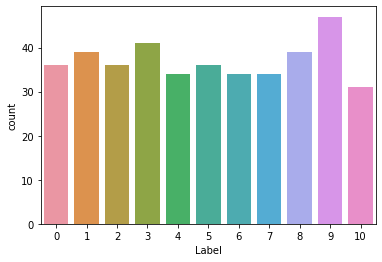

In [18]:
sn.countplot(x = 'Label',data = df)
plt.show()


<br> 

## features histogrames

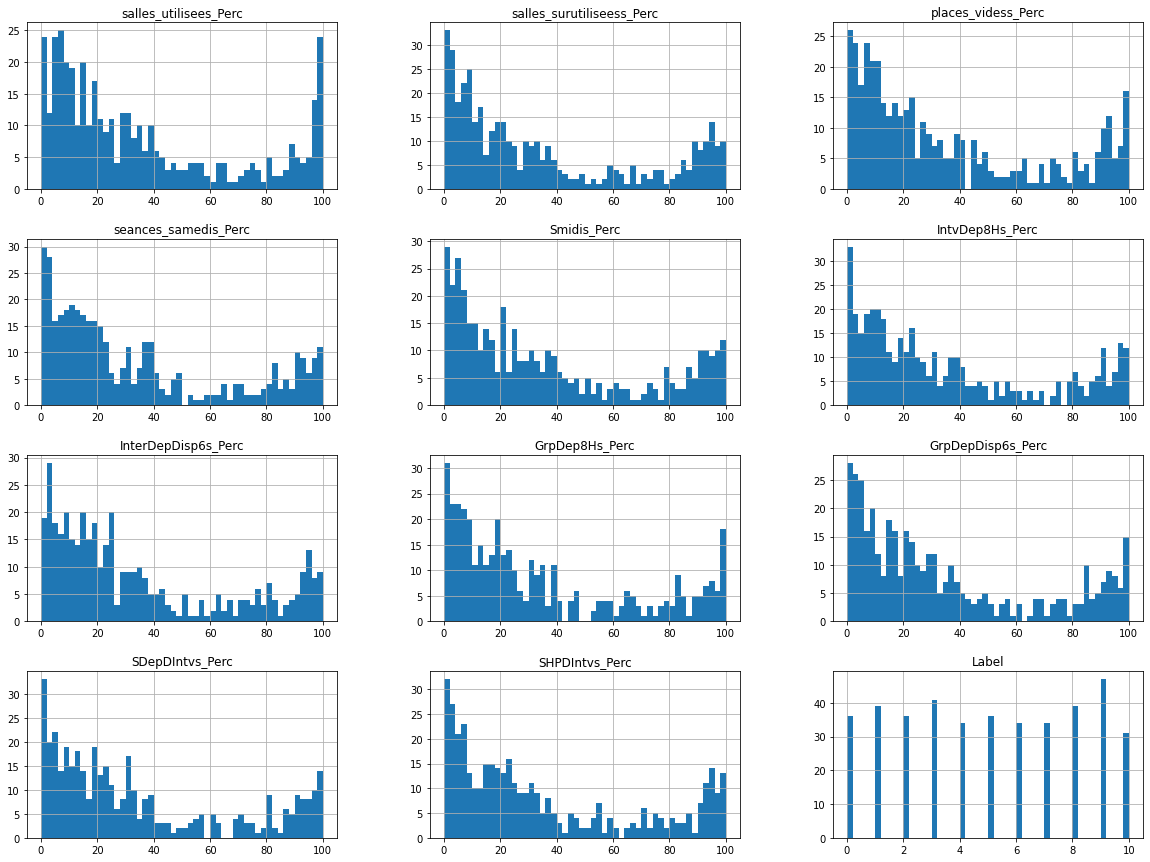

In [19]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<br>

## scatter plot matrix : ploting each pair of features

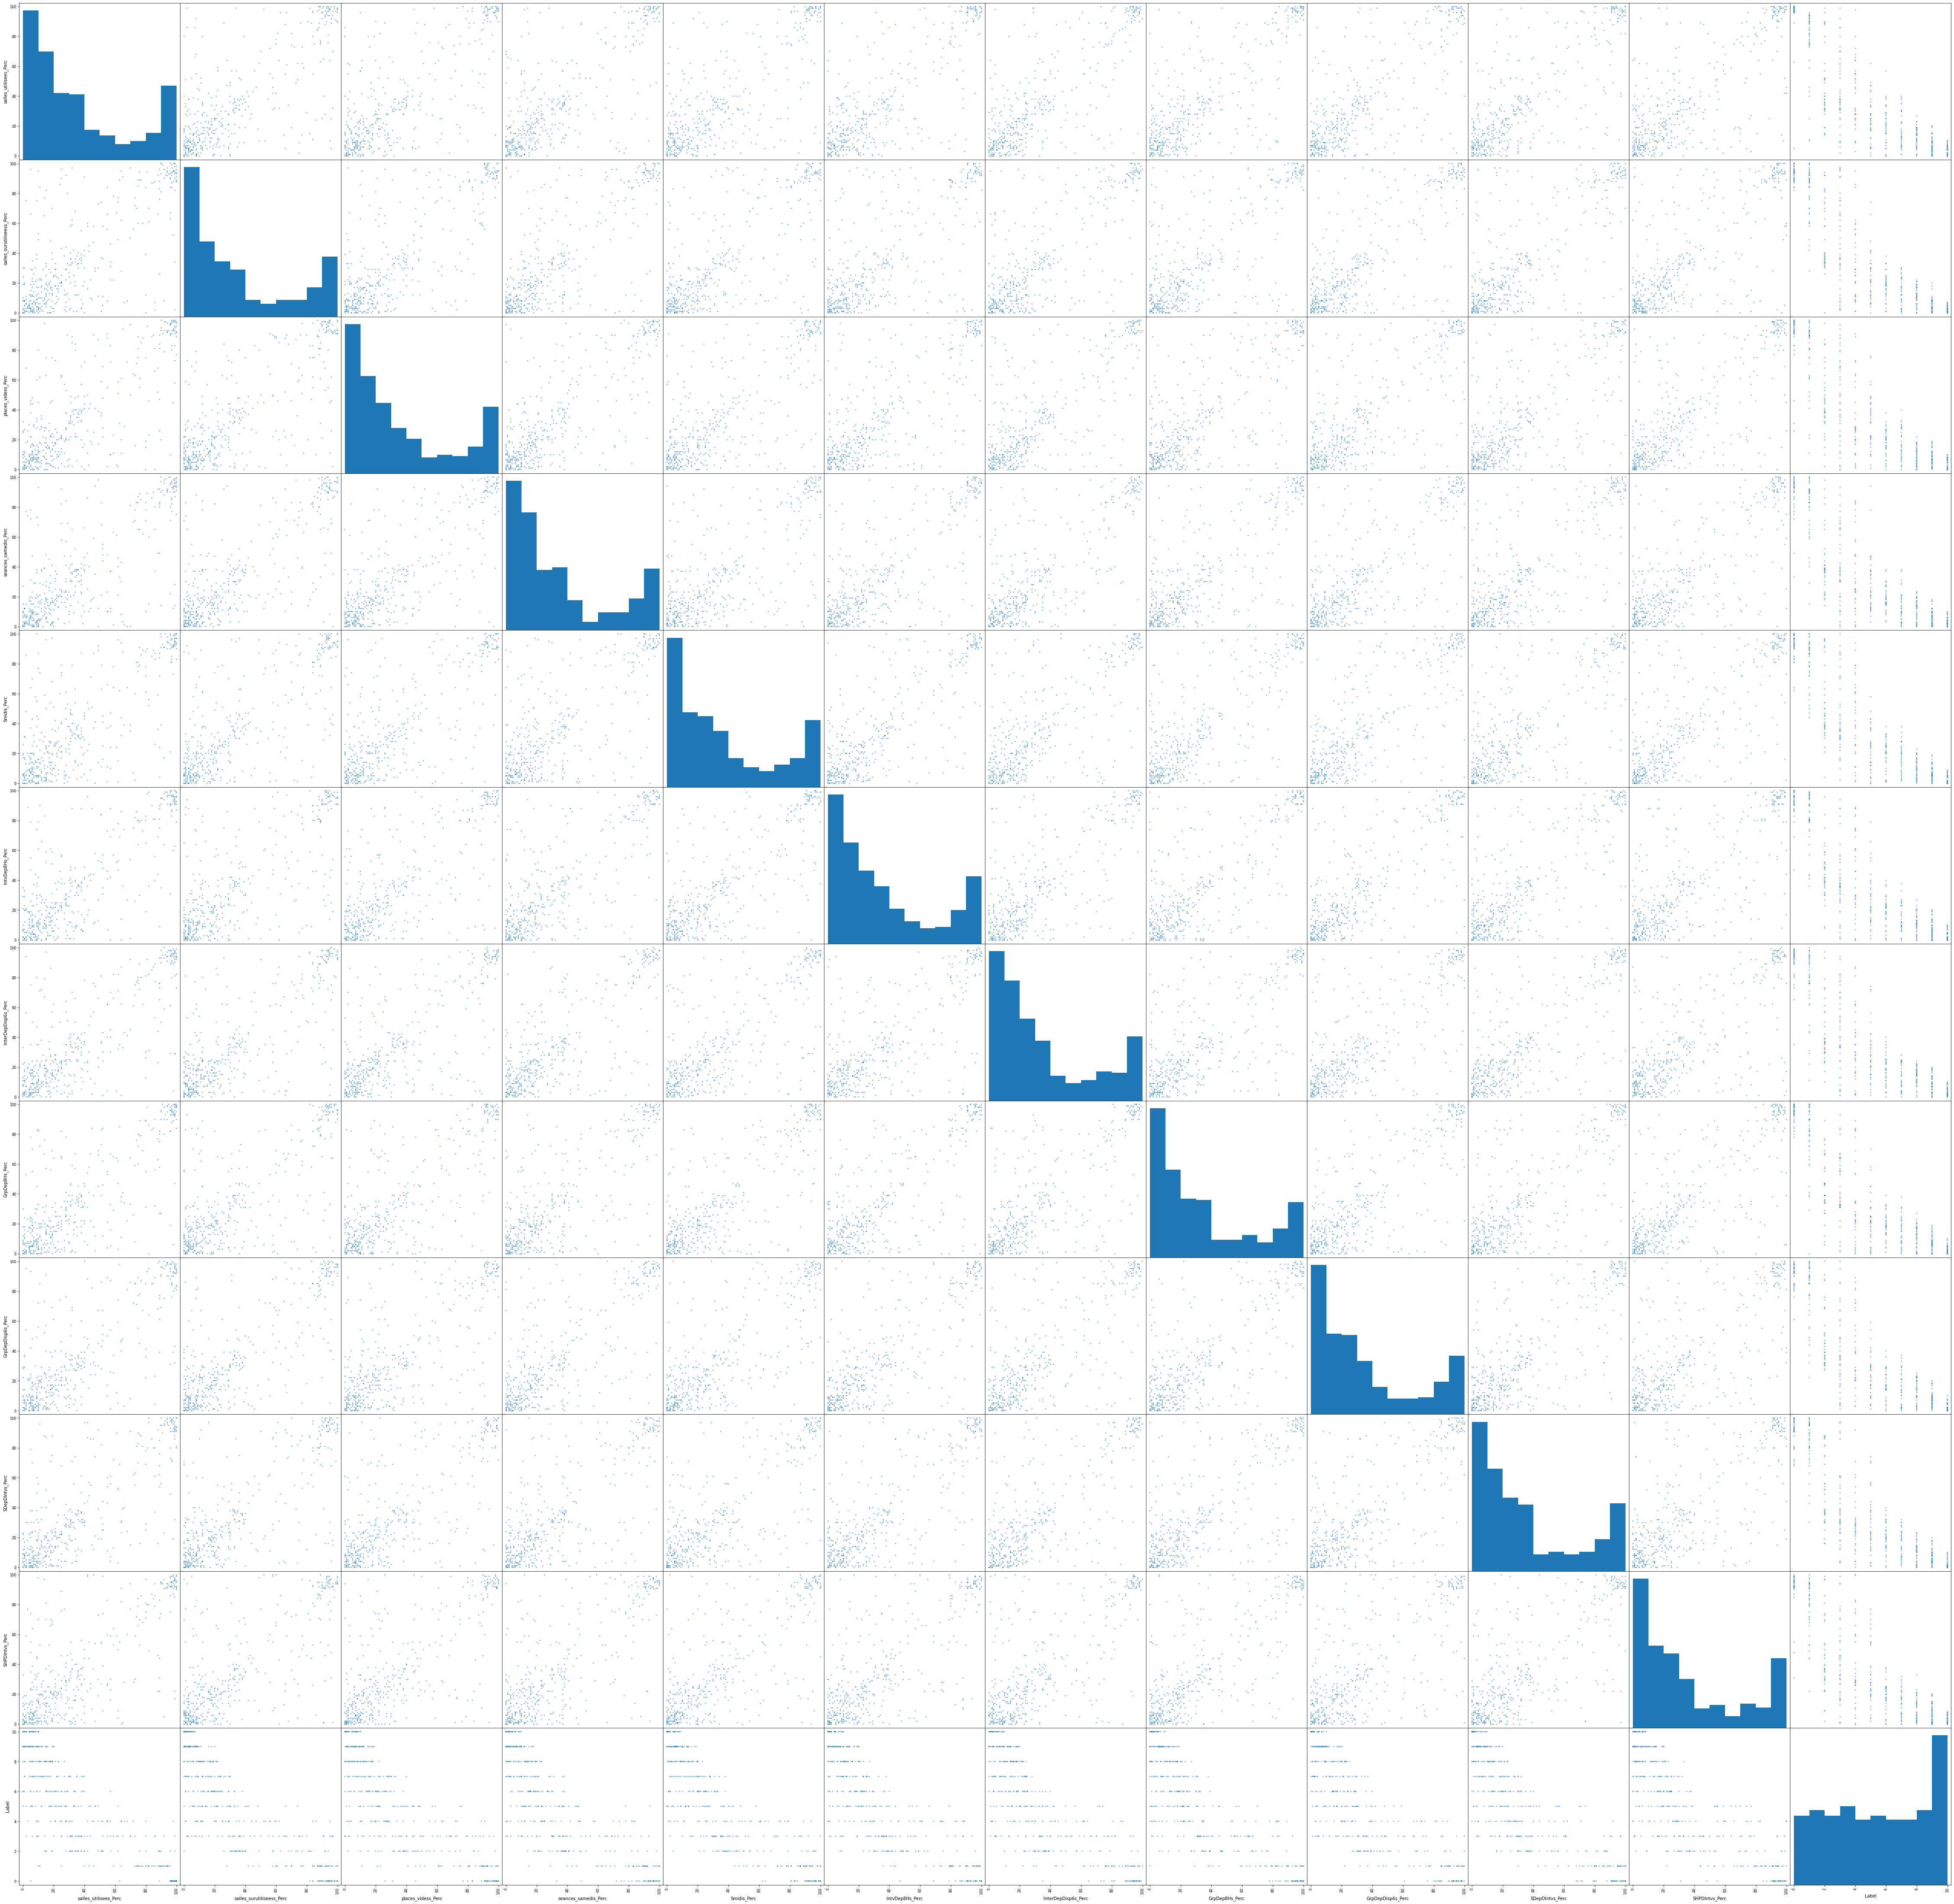

In [20]:
# Scatter plot matrix : better to open the image in a new tab
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (80, 80));

<br>

## SeaBorn pairplot : ploting each pair of features

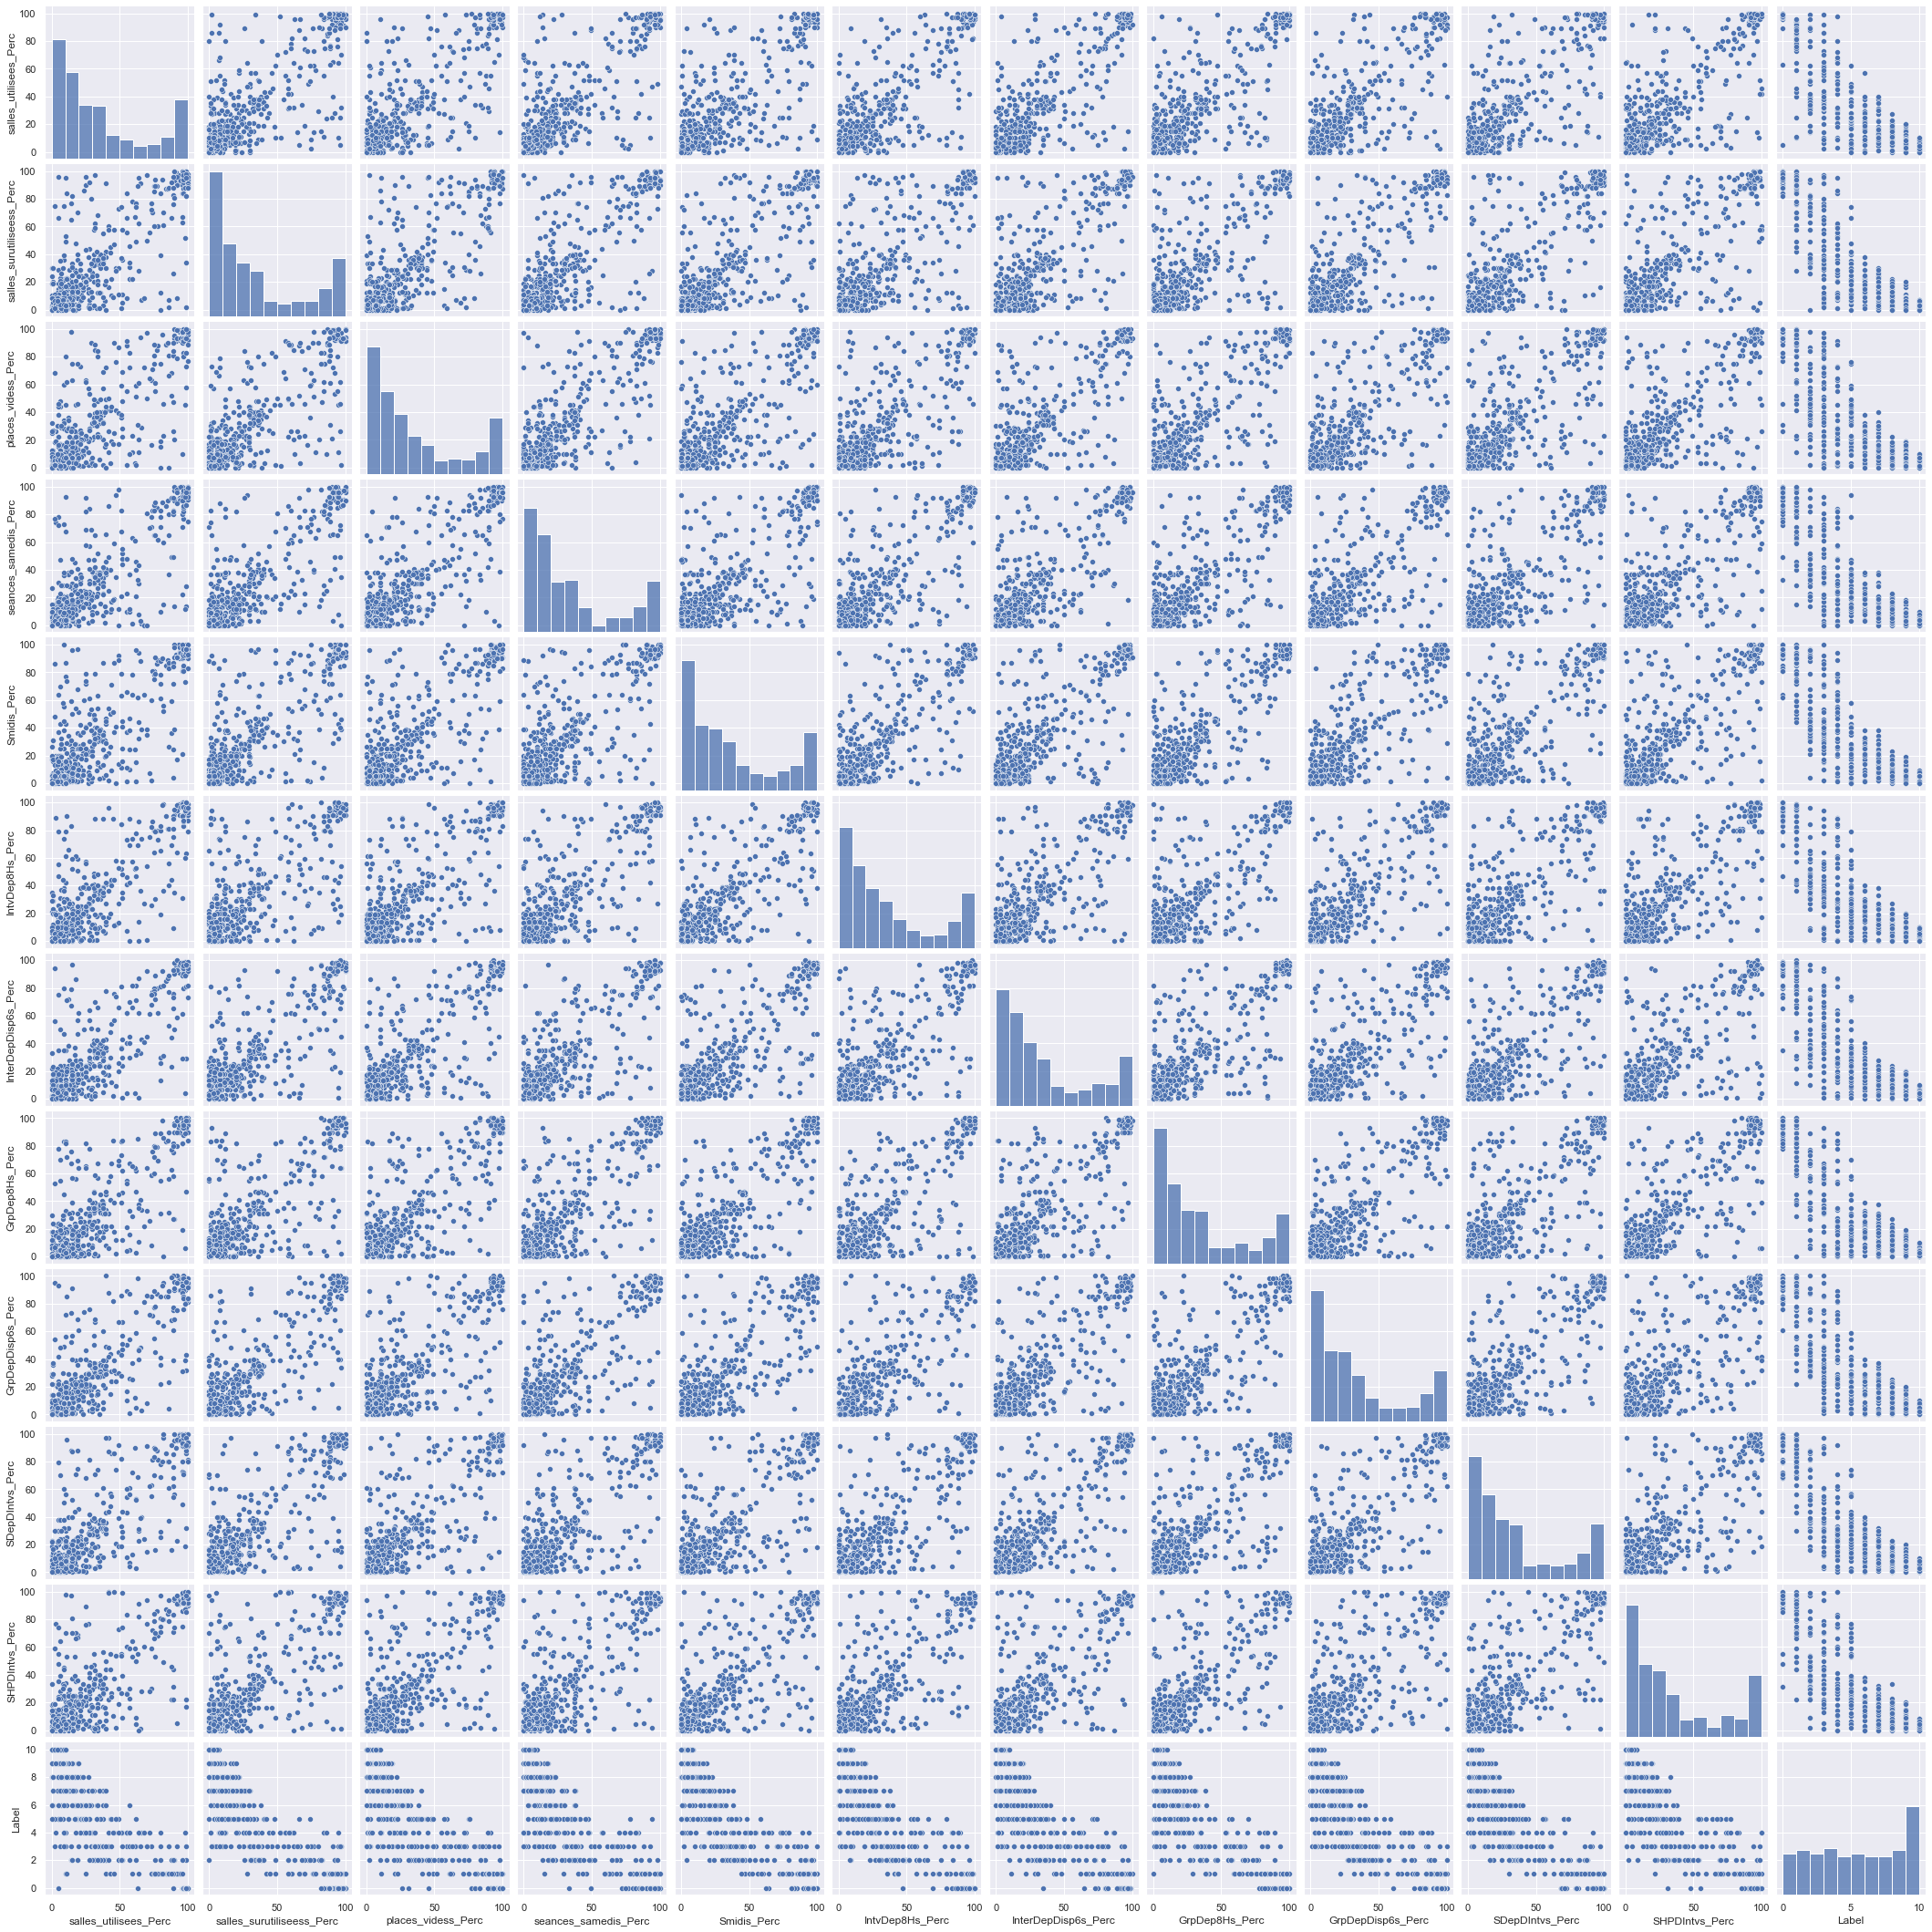

In [21]:
# Pairplot : better to open the image in a new tab
sn.set(rc = {'figure.figsize':(80,80)}) 
sn.pairplot(data = df) # same as the one before, here we can present 3 variables in the same graph, for example 'Label'
plt.show()            # Variable but using color (intensity?) hue; added the argument hue="Label" to pairplot()

<br>

## Correlation HeatMap (Matrix)

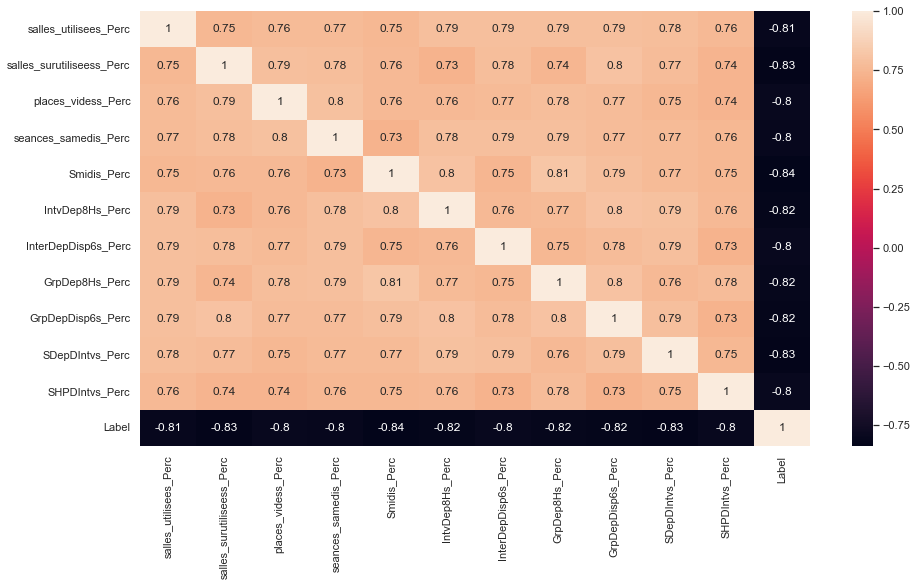

In [22]:
corr_mat = df.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corr_mat, annot=True)
plt.show() 

### Strong correlation between : 
    
* all features and the `Label`


<br>

# Splitting the dataset : test & train sets > stratified splitting


In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=77 )
for train_index, test_index in split.split(df, df["Label"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]


In [24]:
train_set.head()

salles_utilisees_Perc  salles_surutiliseess_Perc  places_videss_Perc  \
269                      9                          9                  16   
151                     21                         33                   1   
134                     43                         41                   3   
155                     33                         25                  40   
137                     12                         10                  34   

     seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  \
269                    19           11               12                   10   
151                    15           35               38                   13   
134                    10           26               20                   30   
155                    37            9               18                   15   
137                    37            4               29                   38   

     GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc  Label  
269              17                 12               18               4      7  
151               4                  4               14              30      5  
134              58                 15               57              55      5  
155              13                 28               27               4      5  
137               1                 23               40              20      5

In [25]:
column_names = list(test_set.columns)
test_set.head()

salles_utilisees_Perc  salles_surutiliseess_Perc  places_videss_Perc  \
54                      32                         34                  39   
59                      32                         33                  32   
106                     55                          8                   2   
256                      6                         21                   8   
128                     28                          4                  20   

     seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  \
54                     30           40               36                   33   
59                     36           34               39                   30   
106                    10           66               73                   62   
256                    23            6                9                   16   
128                    19           43               31                   35   

     GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc  Label  
54               36                 30               30              37      2  
59               39                 37               37              37      2  
106              21                 89               60              83      4  
256              16                  9               11               3      8  
128              31                 22               13              38      5

In [26]:
# Stratified splitting : 
feature = 10

print(" '"+str(feature)+"' label in test set  : ",len(test_set[test_set['Label']==feature])/len(test_set) )
print(" '"+str(feature)+"' label in train set  : ",len(train_set[train_set['Label']==feature])/len(train_set) )

print(" '"+str(feature)+"' label in the main set df:  ", len(df[df['Label']==feature])/len(df))

# the two values are slightly the same, the difference is due to the small dataset i used  (same for other labels)

 '10' label in test set  :  0.07317073170731707
 '10' label in train set  :  0.07692307692307693
 '10' label in the main set df:   0.07616707616707617


<br>

# Scal data


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set) # scaling test set with the same properties as trainning set


In [28]:
train_set_scaled[:2] # 2 rows

array([[-0.82239717, -0.78869541, -0.58603004, -0.45837063, -0.76931994,
        -0.70768613, -0.77337094, -0.54116624, -0.69989921, -0.52162768,
        -0.94771591,  0.63226637],
       [-0.44936286, -0.06358648, -1.05614629, -0.58523497, -0.0275776 ,
         0.10238537, -0.67613862, -0.94470089, -0.94815814, -0.64718147,
        -0.14617458,  0.00193947]])

<br> <br>

# Train Models




In [29]:
# set scoring method 
scoring =  ( "r2", 'neg_mean_squared_error' )
refit = 'r2' # refits an estimator on the whole dataset with the parameter setting that has the best cross-validated roc_auc_ovr_weighted score.


 <br>
 
##  1. scikit Linear Regression Model 

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [47]:


param_grid = [
     {
     },     
 ]
lm = linear_model.LinearRegression()
grid_search = GridSearchCV(lm, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


GridSearchCV(cv=5, estimator=LinearRegression(), param_grid=[{}], refit='r2',
             return_train_score=True, scoring=('r2', 'neg_mean_squared_error'))

In [48]:
lm = grid_search.best_estimator_ # best estimator
lm

LinearRegression()

In [49]:
# training results & metrics 
lm_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
lm_cv_tr

[0.8284176326062818,
 0.16662188183651572,
 0.4081934367876531,
 0.000997304916381836]

### Evaluation of the model using the test set :

In [50]:
# testing results & metrics 

final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

lm_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

lm_test_scores


[0.3543304299550416, 0.15751113933754418, 0.3968767306576995]


 <br>
 
##  2. Decision tree Regressor

In [52]:


param_grid = [
     {
         'criterion': ["squared_error", "friedman_mse", "absolute_error"],
         'splitter': ['best', 'random'],
         'random_state': [  0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
         'ccp_alpha':[ 0, 0.1, 0.001, 0.0001],
     },     
 ]
dt = tree.DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'ccp_alpha': [0, 0.1, 0.001, 0.0001],
                          'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error'],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33],
                          'splitter': ['best', 'random']}],
             refit='r2', return_train_score=True,
             scoring=('r2', 'neg_mean_squared_error'))

In [53]:
dt = grid_search.best_estimator_ # best estimator
dt

DecisionTreeRegressor(ccp_alpha=0, random_state=33)

In [54]:
# training results & metrics 
dt_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
dt_cv_tr

[0.9070932775407519,
 0.48808252052857065,
 0.6986290292627201,
 0.0029900074005126953]

### Evaluation of the model using the test set :

In [55]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

dt_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

dt_test_scores

[-0.02027517700547521, 0.11749775844695992, 0.342779460363307]


 <br>
 
##  3. SVM

In [ ]:

param_grid = [
     {
         'kernel': ["rbf", "linear", "poly", 'sigmoid'],
         'degree': [ 7,8,9,10,11,12],
         'gamma': ['scale','auto'],
         'tol': [ 0.1, 0.01, 0.001,  ],
         'C': [  1,2,3,4,5,6,7,],
         'epsilon': [ 0.1, 0.01, 0.001, 0.0001 ],
     }, 
 ]
svr = svm.SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


In [58]:
svr = grid_search.best_estimator_ # best estimator
svr

SVR(C=2, degree=7, epsilon=0.01, tol=0.1)

In [59]:
# training results & metrics 
svr_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
svr_cv_tr

[0.9671306443183887,
 3707.0072150530423,
 60.88519701087484,
 0.015621185302734375]

### Evaluation of the model using the test set :

In [61]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

svr_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

svr_test_scores

[-0.03647845622713364, 0.045247812457007326, 0.21271533197446613]


 <br>
 
## 4. Random forest 

In [62]:


param_grid = [
     {
        'n_estimators': [  14, 15, 16, 17, 18 ], 
        'max_features': [  8, 9, 10, 12, 13],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
    },
    {
        'bootstrap': [False], 
        'n_estimators': [  14, 15, 16, 17, 18 ], 
        'max_features': [  8, 9, 10, 12, 13],
        'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
    }, 
 ]
rf = RandomForestRegressor( )
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [8, 9, 10, 12, 13],
                          'n_estimators': [14, 15, 16, 17, 18],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]},
                         {'bootstrap': [False],
                          'max_features': [8, 9, 10, 12, 13],
                          'n_estimators': [14, 15, 16, 17, 18],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]}],
             refit='r2', return_train_score=True,
             scoring=('r2', 'neg_mean_squared_error'))

In [63]:
rf = grid_search.best_estimator_ # best estimator
rf

RandomForestRegressor(max_features=8, n_estimators=16, random_state=0)

In [64]:
# training results & metrics 
rf_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
rf_cv_tr

[0.962481173995297,
 0.08698602020084709,
 0.29493392514400085,
 0.036055564880371094]

### Evaluation of the model using the test set :

In [65]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

rf_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

rf_test_scores

[0.1954028357735912, 0.03665653731832308, 0.19145897032608078]


 <br>
 
## 5. Stochastic Gradient Descent

In [68]:


param_grid = [
     {
         'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
         'alpha': [ 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001 ],
         'tol': [ 0.1, 0.01, 0.001, 0.0001, 0.00001 ],
         'epsilon': [ 0.1, 0.01, 0.001, 0.0001 ],
     }, 
 ]
sgd =  linear_model.SGDRegressor(  ) 
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                          'epsilon': [0.1, 0.01, 0.001, 0.0001],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33],
                          'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]}],
             refit='r2', return_train_score=True,
             scoring=('r2', 'neg_mean_squared_error'))

In [69]:
sgd = grid_search.best_estimator_ # best estimator
sgd

SGDRegressor(alpha=0.1, random_state=1, tol=0.01)

In [70]:
# training results & metrics 
sgd_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
sgd_cv_tr

[0.8309462499137041, 0.166391202170109, 0.40791077721740693, 0.0]

### Evaluation of the model using the test set :

In [72]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

sgd_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

sgd_test_scores

[0.4776548653167767, 0.15746653695859228, 0.39682053495074104]


 <br>
 
## 6. KNeighbors_Regression 

In [73]:


param_grid = [
     {
         'n_neighbors': [ 10, 11, 12, 13, 14],
     }, 
 ]
knr = KNeighborsRegressor( )
grid_search = GridSearchCV(knr, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [10, 11, 12, 13, 14]}], refit='r2',
             return_train_score=True, scoring=('r2', 'neg_mean_squared_error'))

In [74]:
knr = grid_search.best_estimator_ # best estimator
knr

KNeighborsRegressor(n_neighbors=10)

In [75]:
# training results & metrics 
knr_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
knr_cv_tr

[0.9534523769661372, 0.04461757787894053, 0.21122873355426938, 0.0]

### Evaluation of the model using the test set :

In [76]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

knr_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

knr_test_scores

[-0.07271554345387155, 0.05238946446217542, 0.22888744933301916]


 <br>
 
## 7. Bayesian_Ridge_Regression

In [77]:


param_grid = [
     {
         'n_iter': [ 5, 10, 20, 50, 100, 200, 300, 400],
         'tol': [ 0.1, 0.01, 0.001, 0.0001, 0.00001 ],
     }, 
 ]
brr = linear_model.BayesianRidge()
grid_search = GridSearchCV(brr, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid=[{'n_iter': [5, 10, 20, 50, 100, 200, 300, 400],
                          'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]}],
             refit='r2', return_train_score=True,
             scoring=('r2', 'neg_mean_squared_error'))

In [78]:
brr = grid_search.best_estimator_ # best estimator
brr

BayesianRidge(n_iter=5, tol=0.01)

In [79]:
# training results & metrics 
brr_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
brr_cv_tr

[0.8298215986470865, 0.16515202812600452, 0.4063890108332219, 0.0]

### Evaluation of the model using the test set :

In [80]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)


brr_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

brr_test_scores

[0.3732783591269878, 0.155212981163683, 0.3939707871958059]


 <br>
 
## 8. XGB regressor

In [81]:
from xgboost import XGBRegressor

param_grid = [
     {
        'n_estimators': [  50, 100, 200, 300 ], 
        'learning_rate': [ 0.001, 0.1, 0.3, 0.5, 0.7],
        'gamma': [0.1, 0.3, 0.5, 0.6, 0.7],
         'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21, 43, 33],
     },
 ]
xgb = XGBRegressor( verbosity = 0)
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=0),
             param_grid=[{'gamma': [0.1, 0.3, 0.5, 0.6, 0.7],
                          'learning_rate': [0.001, 0.1, 0.3, 0.5, 0.7],
                          'n_estimators': [50, 100, 200, 300],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33]}],
             refit='r2', return_train_score=True,
             scoring=('r2', 'neg_mean_squared_error'))

In [82]:
xgb = grid_search.best_estimator_ # best estimator
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [83]:
# training results & metrics 
xgb_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
xgb_cv_tr

[0.9579608402404401,
 1.1416338151669385,
 1.0684726553201718,
 0.07810688018798828]

### Evaluation of the model using the test set :

In [84]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

xgb_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

xgb_test_scores

[0.15298137271687906, 0.04189356237267947, 0.2046791693667909]


 <br>
 
##  9. ExtraTreesRegressor

In [85]:

param_grid = [
     {
         'n_estimators': [  50, 100, 200, 300], 
         'random_state': [ 0, 1, 3, 5, 7, 9, 11, 17, 21 ],
         'ccp_alpha':[ 0, 0.1, 0.001, 0.0001],
         'criterion': ["squared_error", "friedman_mse", "absolute_error"],
     },
 ]
etr = ExtraTreesRegressor(  )
grid_search = GridSearchCV(etr, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid=[{'ccp_alpha': [0, 0.1, 0.001, 0.0001],
                          'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error'],
                          'n_estimators': [50, 100, 200, 300],
                          'random_state': [0, 1, 3, 5, 7, 9, 11, 17, 21]}],
             refit='r2', return_train_score=True,
             scoring=('r2', 'neg_mean_squared_error'))

In [86]:
etr = grid_search.best_estimator_ # best estimator
etr

ExtraTreesRegressor(ccp_alpha=0, n_estimators=200, random_state=17)

In [87]:
# training results & metrics 
etr_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
etr_cv_tr

[0.9709947281189779,
 0.1545913822140143,
 0.393181106125427,
 0.25413060188293457]

### Evaluation of the model using the test set :

In [88]:
final_model = grid_search.best_estimator_
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = final_model.predict(X_test)

etr_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

etr_test_scores

[0.20075177845404524, 0.02709898044429037, 0.16461767962248275]


 <br>
 
##  10. MLP Regressor (ANNs)

In [89]:
from sklearn.neural_network import MLPRegressor

In [90]:
param_grid = [
    {
        'hidden_layer_sizes': [  (12, 24, 12, 1), ],
        'activation': [ 'relu', 'logistic', 'identity', 'tanh' ], 
        'solver': [ 'sgd', 'lbfgs', 'adam'], # adam , sgd
        'alpha': [ 0.001, 0.01, 0.0001, 0.00001],
        'learning_rate':[ 'constant', 'adaptive'],
        'random_state': [ 0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43, 33],
        'max_iter':[ 50, 100 ],
    },
]
mlp = MLPRegressor(verbose=False)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring=scoring, refit=refit, return_train_score=True)
grid_search.fit(train_set_scaled[:,:11], train_set_scaled[:,11])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid=[{'activation': ['relu', 'logistic', 'identity',
                                         'tanh'],
                          'alpha': [0.001, 0.01, 0.0001, 1e-05],
                          'hidden_layer_sizes': [(12, 24, 12, 1)],
                          'learning_rate': ['constant', 'adaptive'],
                          'max_iter': [50, 100],
                          'random_state': [0, 1, 2, 3, 5, 7, 9, 11, 17, 21, 43,
                                           33],
                          'solver': ['sgd', 'lbfgs', 'adam']}],
             refit='r2', return_train_score=True,
             scoring=('r2', 'neg_mean_squared_error'))

In [91]:
mlp = grid_search.best_estimator_ # best estimator
mlp

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(12, 24, 12, 1),
             max_iter=50, random_state=3, solver='lbfgs')

In [92]:
# training results & metrics 
mlp_cv_tr = [ 
      grid_search.cv_results_['mean_test_r2'].max() , # roc "r2", 
      -grid_search.cv_results_['mean_test_neg_mean_squared_error'].min(), # mse
      math.sqrt(-grid_search.cv_results_['mean_test_neg_mean_squared_error'].min()), #rmse
      grid_search.refit_time_ # refit time
]
mlp_cv_tr

[0.9638957624434248,
 2.9815275897702898,
 1.7267100479728175,
 0.07268524169921875]

### Evaluation of the model using the test set :

In [94]:
X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = mlp.predict(X_test)

mlp_test_scores = [
    r2_score( np.int64(y_test).tolist(), final_predictions.tolist() ), # r2
    mean_squared_error(y_test, final_predictions), #mse 
    math.sqrt( mean_squared_error(y_test, final_predictions) ), # rmse
]

mlp_test_scores

[0.07964926027822972, 0.05017280821980866, 0.2239928753773402]

# Comparing results results

## Models results & metrics during trainning

In [95]:

pd.DataFrame({  
        'Model' : [ 
            "scikit Linear Regression Model ",
            "Decision tree ",
            "SVM-svr",
            "Random forest ",
            "Stochastic Gradient Descent",
            "KNeighbors_Regression",
            "Bayesian_Ridge_Regression",
            "XGB Regressor",
            "ExtraTreesRegressor",
            " MLP Regressor (ANNs)",           
        ],
        'train_rmse' : [ tab[2] for tab in [  lm_cv_tr, dt_cv_tr, svr_cv_tr, rf_cv_tr, sgd_cv_tr, knr_cv_tr, brr_cv_tr, xgb_cv_tr, etr_cv_tr, mlp_cv_tr] ],
        'train_mse' : [ tab[1] for tab in [  lm_cv_tr, dt_cv_tr, svr_cv_tr, rf_cv_tr, sgd_cv_tr, knr_cv_tr, brr_cv_tr, xgb_cv_tr, etr_cv_tr, mlp_cv_tr] ],
        'train_refit_time' : [ tab[3] for tab in [  lm_cv_tr, dt_cv_tr, svr_cv_tr, rf_cv_tr, sgd_cv_tr, knr_cv_tr, brr_cv_tr, xgb_cv_tr, etr_cv_tr, mlp_cv_tr] ],
        'train_r2' :  [ tab[0] for tab in [  lm_cv_tr, dt_cv_tr, svr_cv_tr, rf_cv_tr, sgd_cv_tr, knr_cv_tr, brr_cv_tr, xgb_cv_tr, etr_cv_tr, mlp_cv_tr] ],
})

Model  train_rmse    train_mse  train_refit_time  \
0  scikit Linear Regression Model     0.408193     0.166622          0.000997   
1                   Decision tree     0.698629     0.488083          0.002990   
2                          SVM-svr   60.885197  3707.007215          0.015621   
3                   Random forest     0.294934     0.086986          0.036056   
4      Stochastic Gradient Descent    0.407911     0.166391          0.000000   
5            KNeighbors_Regression    0.211229     0.044618          0.000000   
6        Bayesian_Ridge_Regression    0.406389     0.165152          0.000000   
7                    XGB Regressor    1.068473     1.141634          0.078107   
8              ExtraTreesRegressor    0.393181     0.154591          0.254131   
9             MLP Regressor (ANNs)    1.726710     2.981528          0.072685   

   train_r2  
0  0.828418  
1  0.907093  
2  0.967131  
3  0.962481  
4  0.830946  
5  0.953452  
6  0.829822  
7  0.957961  
8  0.970995  
9  0.963896

<br>

## Models results & metrics during testing

In [96]:

pd.DataFrame({  
        'Model' : [ 
            "scikit Linear Regression Model ",
            "Decision tree ",
            "SVM-svr",
            "Random forest ",
            "Stochastic Gradient Descent",
            "KNeighbors_Regression",
            "Bayesian_Ridge_Regression",
            "XGB Regressor",
            "ExtraTreesRegressor",
            " MLP Regressor (ANNs)",           
        ],
        'test_rmse' : [ tab[2] for tab in [  lm_test_scores, dt_test_scores, svr_test_scores, rf_test_scores, sgd_test_scores, knr_test_scores, brr_test_scores, xgb_test_scores, etr_test_scores, mlp_test_scores] ],
        'tesst_mse' : [ tab[1] for tab in [  lm_test_scores, dt_test_scores, svr_test_scores, rf_test_scores, sgd_test_scores, knr_test_scores, brr_test_scores, xgb_test_scores, etr_test_scores, mlp_test_scores] ],
        'test_r2' :  [ tab[0] for tab in [  lm_test_scores, dt_test_scores, svr_test_scores, rf_test_scores, sgd_test_scores, knr_test_scores, brr_test_scores, xgb_test_scores, etr_test_scores, mlp_test_scores] ],
})

Model  test_rmse  tesst_mse   test_r2
0  scikit Linear Regression Model    0.396877   0.157511  0.354330
1                   Decision tree    0.342779   0.117498 -0.020275
2                          SVM-svr   0.212715   0.045248 -0.036478
3                   Random forest    0.191459   0.036657  0.195403
4      Stochastic Gradient Descent   0.396821   0.157467  0.477655
5            KNeighbors_Regression   0.228887   0.052389 -0.072716
6        Bayesian_Ridge_Regression   0.393971   0.155213  0.373278
7                    XGB Regressor   0.204679   0.041894  0.152981
8              ExtraTreesRegressor   0.164618   0.027099  0.200752
9             MLP Regressor (ANNs)   0.223993   0.050173  0.079649

<br>

# Manual testing

In [151]:
###
# Trying to scale input from range (0-10) to scaler's range
###

# set input creterions

seance_en_simultanite_perc = 0          #   séances avec contrainte de simultanéité
salles_utilisees_perc = 0              #   salles utilisées
salles_surutiliseess_Perc = 0           #   salles surutilisées (44Heures /Semaine)
places_videss_Perc = 0                #    places vides
seances_samedis_Perc = 100               #   séances de samedi
Smidis_Perc = 100                          #  séances de midi 
IntvDep8Hs_Perc = 0                     #  'intervenants qui depassent 8Heures /Jour
InterDepDisp6s_Perc = 0                 #  d'intervenants qui depassent le dispatchement 6Heures/Jour
GrpDep8Hs_Perc = 0                      #  groupes qui depassent 8Heures /Jour
GrpDepDisp6s_Perc = 0                    #  groupes qui depassent le dispatchement 6Heures/Jour
SHPDIntvs_Perc = 0                      # séances qui dépassent la disponibilité des intrervenants
SDepDIntvs_Perc = 0                     # séances hors préférences de disponibilités des intervenants

manual_testing_var = pd.DataFrame([[ salles_utilisees_perc, salles_surutiliseess_Perc, places_videss_Perc, seances_samedis_Perc, 
Smidis_Perc, IntvDep8Hs_Perc, InterDepDisp6s_Perc, GrpDep8Hs_Perc, GrpDepDisp6s_Perc, SHPDIntvs_Perc, SDepDIntvs_Perc, 0]], columns=column_names)

scaled_testing_var = scaler.transform(manual_testing_var)
scaled_testing_var # scaled input

array([[-1.1021729 , -1.06061126, -1.08748737,  2.11063229,  1.9813079 ,
        -1.08156528, -1.09747868, -1.0688654 , -1.0722876 , -1.08661971,
        -1.07102996, -1.5738778 ]])

In [152]:
predicted_y_scaled = [
            lm.predict( scaled_testing_var[:,:11] )[0]  ,
            dt.predict( scaled_testing_var[:,:11] )[0] ,
            svr.predict( scaled_testing_var[:,:11] )[0] ,
            rf.predict( scaled_testing_var[:,:11] )[0] ,
            sgd.predict( scaled_testing_var[:,:11] )[0] ,
            knr.predict( scaled_testing_var[:,:11] )[0] ,
            brr.predict( scaled_testing_var[:,:11] )[0] ,
            xgb.predict( scaled_testing_var[:,:11] )[0] ,
            etr.predict( scaled_testing_var[:,:11] )[0] ,
            mlp.predict( scaled_testing_var[:,:11] )[0]  
] # 

pridicted_x_scaled = [
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
    scaled_testing_var,
]
pridicted_xy_scaled = np.copy(pridicted_x_scaled)
predicted_y_scaled # each model's output


[0.3193022118084719,
 0.6322663730186254,
 0.034323748930598585,
 0.4746846466144434,
 0.39400205053216925,
 0.12800484852524313,
 0.35273630524139,
 0.7060427,
 0.4983219055750698,
 0.3683451968844367]

In [153]:

for i in range( len(pridicted_x_scaled) )  :
    copy = np.copy( pridicted_x_scaled[i] )
    value = predicted_y_scaled[i]
    copy[:,11]= value
    pridicted_xy_scaled[i] = copy
pridicted_xy_scaled[:2,:] # adding each scaled output to scaled input in order to unscale the whole row

array([[[-1.1021729 , -1.06061126, -1.08748737,  2.11063229,
          1.9813079 , -1.08156528, -1.09747868, -1.0688654 ,
         -1.0722876 , -1.08661971, -1.07102996,  0.31930221]],

       [[-1.1021729 , -1.06061126, -1.08748737,  2.11063229,
          1.9813079 , -1.08156528, -1.09747868, -1.0688654 ,
         -1.0722876 , -1.08661971, -1.07102996,  0.63226637]]])

In [154]:
pridicted_xy_unscaled = np.copy(pridicted_xy_scaled)
for i in range( len( pridicted_xy_unscaled ) ):
    copy = np.copy( pridicted_xy_unscaled[i] )
    copy_unscaled =  scaler.inverse_transform(copy) # unscaling the whole row to get label in range 0-10
    pridicted_xy_unscaled[i] = np.copy(copy_unscaled)
pridicted_xy_unscaled[:2]


array([[[  0.        ,   0.        ,   0.        , 100.        ,
         100.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   6.00697826]],

       [[  0.        ,   0.        ,   0.        , 100.        ,
         100.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   7.        ]]])

In [155]:

pd.DataFrame({  
        'Model' : [ 
            "scikit Linear Regression Model ",
            "Decision tree ",
            "SVM-svr",
            "Random forest ",
            "Stochastic Gradient Descent",
            "KNeighbors_Regression",
            "Bayesian_Ridge_Regression",
            "XGB Regressor",
            "ExtraTreesRegressor",
            " MLP Regressor (ANNs)",           
        ],
        'Predicted Value' : [ 
            pridicted_xy_unscaled[i][0,11] for i in range(len(pridicted_xy_unscaled))
        ],
})


Model  Predicted Value
0  scikit Linear Regression Model          6.006978
1                   Decision tree          7.000000
2                          SVM-svr         5.102754
3                   Random forest          6.500000
4      Stochastic Gradient Descent         6.243998
5            KNeighbors_Regression         5.400000
6        Bayesian_Ridge_Regression         6.113063
7                    XGB Regressor         7.234089
8              ExtraTreesRegressor         6.575000
9             MLP Regressor (ANNs)         6.162590

<br>

# Result

> Having tested many cases, i see that MLP model is better as it gives better & reasonable results and it has minimum rmse `having given the current dataSet` !!

In [169]:
selected_model = mlp

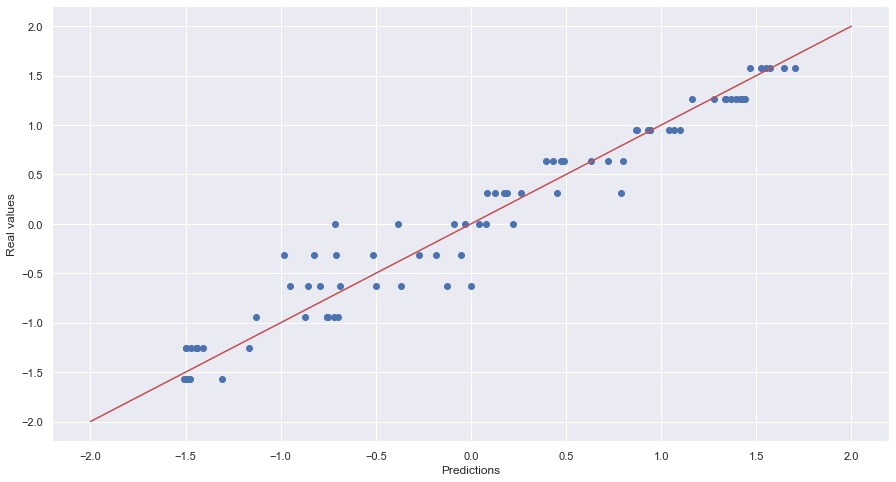

In [170]:
# scatter 'y' test values ; real & preditions

#mlp # selected model

X_test = test_set_scaled[:,:11]
y_test = test_set_scaled[:,11]
final_predictions = selected_model.predict(X_test)
# this is a model's output with less epochs & layers
plt.scatter( final_predictions, y_test)
plt.plot( [i for i in range(-2,3)], [i for i in range(-2,3)], "r")
plt.xlabel( "Predictions")
plt.ylabel( "Real values")
plt.show()

<br>

# Storing & exporting the model with scaler !



## using pickle

In [5]:
import pickle

In [7]:
pickle.dump( selected_model, open('model2.pkl', 'wb'))
pickle.dump( scaler, open('scaler2.pkl', 'wb'))

# use this Later to load the model :

pickled_model = pickle.load(open('model2.pkl', 'rb'))
scaler2 = pickle.load(open('scaler2.pkl', 'rb'))
#pickled_model.predict(X_test)



## using joblib

In [183]:
import joblib

In [184]:
#perist it
joblib.dump(selected_model, "model2.sav")
joblib.dump(scaler, "scaler2.sav")

# load it
loaded_model = joblib.load("model2.sav")
loaded_scaler = joblib.load("scaler2.sav")

<br>

<br>

# Evaluate model results on real data

In [8]:
filename = "evaluations.xlsx"

dd = pd.read_excel(filename)
dd.head(2)

Unnamed: 0 Planification  SC_simultanite_Perc  salles_utilisees_Perc  \
0           0   Planif-i-01             0.974026                   82.5   
1           1   Planif-i-02             0.974026                   80.0   

   salles_surutiliseess_Perc  places_videss_Perc  seances_samedis_Perc  \
0                          0           36.257050             15.259740   
1                          0           37.294693             15.909091   

   Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  GrpDep8Hs_Perc  \
0    25.000000              0.0                    0             0.0   
1    22.727273              0.0                    0             0.0   

   GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc  Label  
0                  0         2.597403               0    NaN  
1                  0         1.623377               0    NaN

In [9]:
features = dd.iloc[:,3:]
features.iloc[:,-1]=0
features.head(2)

salles_utilisees_Perc  salles_surutiliseess_Perc  places_videss_Perc  \
0                   82.5                          0           36.257050   
1                   80.0                          0           37.294693   

   seances_samedis_Perc  Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  \
0             15.259740    25.000000              0.0                    0   
1             15.909091    22.727273              0.0                    0   

   GrpDep8Hs_Perc  GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc  Label  
0             0.0                  0         2.597403               0      0  
1             0.0                  0         1.623377               0      0

In [10]:
features_scaled = scaler.transform(features)
features_scaled[:2]

array([[ 1.46243795, -1.06061126,  0.04884784, -0.57699702, -0.33663691,
        -1.08156528, -1.09747868, -1.0688654 , -1.0722876 , -1.00509128,
        -1.07102996, -1.5738778 ],
       [ 1.38472247, -1.06061126,  0.08136871, -0.55640216, -0.40687766,
        -1.08156528, -1.09747868, -1.0688654 , -1.0722876 , -1.03566445,
        -1.07102996, -1.5738778 ]])

In [11]:
scaled_lables = []
for i in range(len( features_scaled )):
    scaled_lables.append( selected_model.predict( [ features_scaled[i][:11] ] )[0] )
scaled_lables[:2]

[0.7762211301875142, 0.8150099903836656]

In [12]:
for i in range( len( scaled_lables ) ):
    features_scaled[i,11] = scaled_lables[i]
features_scaled[:2]

array([[ 1.46243795, -1.06061126,  0.04884784, -0.57699702, -0.33663691,
        -1.08156528, -1.09747868, -1.0688654 , -1.0722876 , -1.00509128,
        -1.07102996,  0.77622113],
       [ 1.38472247, -1.06061126,  0.08136871, -0.55640216, -0.40687766,
        -1.08156528, -1.09747868, -1.0688654 , -1.0722876 , -1.03566445,
        -1.07102996,  0.81500999]])

In [13]:
features_unscaled = scaler.inverse_transform( features_scaled )
features_unscaled[:2,:]

array([[82.5       ,  0.        , 36.25704957, 15.25974026, 25.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.5974026 ,
         0.        ,  7.45676222],
       [80.        ,  0.        , 37.29469304, 15.90909091, 22.72727273,
         0.        ,  0.        ,  0.        ,  0.        ,  1.62337662,
         0.        ,  7.57983759]])

In [14]:
for i in range( len( dd ) ):
    dd.iloc[i, 14]=features_unscaled[i, 11]
dd.head(2)

Unnamed: 0 Planification  SC_simultanite_Perc  salles_utilisees_Perc  \
0           0   Planif-i-01             0.974026                   82.5   
1           1   Planif-i-02             0.974026                   80.0   

   salles_surutiliseess_Perc  places_videss_Perc  seances_samedis_Perc  \
0                          0           36.257050             15.259740   
1                          0           37.294693             15.909091   

   Smidis_Perc  IntvDep8Hs_Perc  InterDepDisp6s_Perc  GrpDep8Hs_Perc  \
0    25.000000              0.0                    0             0.0   
1    22.727273              0.0                    0             0.0   

   GrpDepDisp6s_Perc  SDepDIntvs_Perc  SHPDIntvs_Perc     Label  
0                  0         2.597403               0  7.456762  
1                  0         1.623377               0  7.579838

In [15]:
with pd.ExcelWriter("evaluations.xlsx", mode="w", engine="openpyxl") as writer:
    dd.to_excel(writer, header=True, index=False)